# 9.26

考虑一个信号 $y(t)$，它与两个信号 $x_1(t)$ 和 $x_2(t)$ 的关系是

$$
y(t) = x_1(t - 2) * x_2(-t + 3)
$$

其中，

$$
x_1(t) = e^{-2t}u(t), \quad x_2(t) = e^{-3t}u(t)
$$

已知

$$
e^{-at}u(t) \stackrel{\mathcal{L}}{\longleftrightarrow}\frac{1}{s + a}, \quad \Re\{s\} > -a
$$

利用拉普拉斯变换性质，确定 $y(t)$ 的拉普拉斯变换 $Y(s)$

## Solution

令 $x_3(t) = x_1(t - 2)$，由拉普拉斯变换的时移性质，有

$$
X_3(s) = e^{-2s}X_1(s) = \frac{e^{-2s}}{s+2}, \quad \Re\{s\} > -2
$$

令 $x_5(t) = x_4(t - 3) = x_2(- t + 3)$，由拉普拉斯变换的时域尺度变换和时移性质，有

$$
\begin{aligned}
X_4(s) &= X_2(-s) = \frac{1}{-s + 3}, \quad \Re\{s\} < 3 \\
X_5(s) &= e^{-3s}X_4(s) = \frac{e^{-3s}}{-s + 3}, \quad \Re\{s\} < 3
\end{aligned}
$$

由拉普拉斯变换的卷积性质，有

$$
Y(s) = X_3(s)X_5(s) = \frac{e^{-5s}}{(s + 2)(-s + 3)}, \quad  -2 < \Re\{s\} < 3
$$

# 9.31

有一个连续时间线性时不变系统，其输入 $x(t)$ 和输出 $y(t)$ 由下列微分方程所关联：

$$
\frac{d^2y(t)}{dt^2} - \frac{dy(t)}{dt} - 2y(t) = x(t)
$$

设 $X(s)$ 和 $Y(s)$ 分别是 $x(t)$ 和 $y(t)$ 的拉普拉斯变换，$H(s)$ 是系统单位冲激响应 $h(t)$ 的拉普拉斯变换。

1. 求 $H(s)$ 作为 $s$ 的两个多项式之比，画出 $H(s)$ 的零-极点图。
1. 对下列每一种情况 求 $h(t)$ :
   1. 系统是稳定的。
   2. 系统是因果的。
   3. 系统既不是稳定的又不是因果的。

## Solution

### (1)

系统的传递函数为

$$
H(s)=\frac{Y(s)}{X(s)}=\frac{1}{s^2-s-2}\,.
$$

即，

$$
H(s)=\frac{1}{(s-2)(s+1)}.
$$

- **零点**：分子为常数 $1$，故没有有限零点。
- **极点**：满足 $s-2=0$ 和 $s+1=0$，即有两个极点  
  $$
  s=2 \quad \text{(右半平面)}\quad \text{和}\quad s=-1 \quad \text{(左半平面)}.
  $$


No finite zeros.


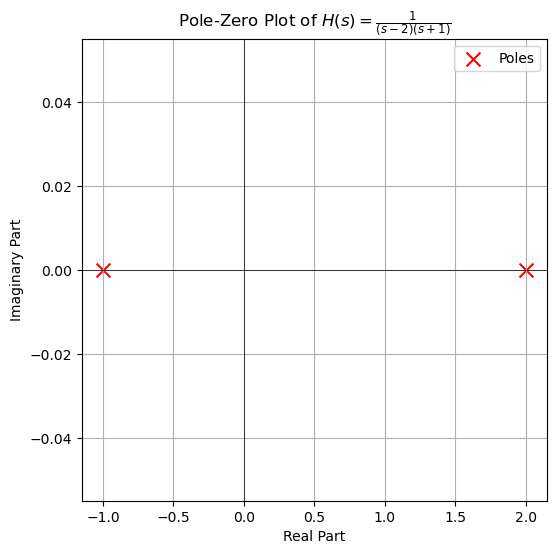

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 定义系统的极点和零点
poles = [2, -1]        # 极点在 s=2 和 s=-1
zeros = []             # 无有限零点

plt.figure(figsize=(6,6))

# 绘制极点，使用红色 'x'
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', s=100, label='Poles')

# 如果有零点，则绘制零点（此处为空）
if zeros:
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', s=100, label='Zeros')
else:
    print("No finite zeros.")

# 绘制实轴和虚轴
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Plot of $H(s)=\\frac{1}{(s-2)(s+1)}$')
plt.legend()
plt.grid(True)
plt.show()


---

### (2)

由

$$
H(s)=\frac{1}{(s-2)(s+1)},
$$

设

$$
\frac{1}{(s-2)(s+1)}=\frac{A}{s-2}+\frac{B}{s+1}.
$$

解之：两边乘 $(s-2)(s+1)$ 得

$$
1 = A(s+1)+B(s-2).
$$

令 $s=2$ 得
$$
1=A(3) \quad\Longrightarrow\quad A=\frac{1}{3}.
$$
令 $s=-1$ 得
$$
1=B(-3) \quad\Longrightarrow\quad B=-\frac{1}{3}.
$$

因此，

$$
H(s)=\frac{1}{3}\frac{1}{s-2}-\frac{1}{3}\frac{1}{s+1}.
$$

下面讨论三种不同 ROC 下的逆变换。

---

**(1) 系统稳定的情况**

稳定系统要求 $h(t)$ 必须绝对可积，且 ROC 必须包含虚轴。由于两个极点分别为 $s=-1$ 和 $s=2$，因此必须选取两极之间的 ROC：

$$
-1<\Re\{s\}<2.
$$

在这种 ROC 下，
- 对于 $t>0$：闭合右半平面时只包围位于 ROC左侧的极点 $s=-1$。由标准公式，当 $s=a$ 位于左侧时，

  $$
  \mathcal{L}^{-1}\left\{\frac{1}{s-a}\right\}=e^{at}u(t).
  $$

  故 $\displaystyle \mathcal{L}^{-1}\left\{\frac{1}{s+1}\right\}=e^{-t}u(t).$

- 对于 $t<0$：闭合左半平面时包围 ROC右侧的极点 $s=2$，但积分方向反向，故多了负号。标准结果为

  $$
  \mathcal{L}^{-1}\left\{\frac{1}{s-2}\right\}=-e^{2t}u(-t).
  $$

因此，
$$
\begin{aligned}
h(t) &= \frac{1}{3}\Bigl\{ {-e^{2t}u(-t)}{1/(s-2)}\Bigr\} - \frac{1}{3}\Bigl\{ {e^{-t}u(t)}\Bigr\}\\[1mm]
&=-\frac{1}{3}\,e^{2t}u(-t) - \frac{1}{3}\,e^{-t}u(t).
\end{aligned}
$$

---

**(2) 系统因果的情况**

因果系统要求 $h(t)=0$ 当 $t<0$，这对应的 ROC 必须在所有极点右侧，即

$$
\Re\{s\}>2.
$$

在这种 ROC 下，均采用右侧逆变换：

- $\mathcal{L}^{-1}\{1/(s-2)\}=e^{2t}u(t)$,
- $\mathcal{L}^{-1}\{1/(s+1)\}=e^{-t}u(t)$.

因此，

$$
h(t)=\frac{1}{3}\,e^{2t}u(t)-\frac{1}{3}\,e^{-t}u(t)=\frac{1}{3}\Bigl(e^{2t}-e^{-t}\Bigr)u(t).
$$

---

**(3) 系统既不稳定也不因果的情况**

若选择 ROC 在所有极点左侧，即

$$
\Re\{s\}<-1,
$$

则得到反因果系统。此时使用反因果公式：  
对反因果信号，标准公式为

$$
\mathcal{L}^{-1}\left\{\frac{1}{s-a}\right\} = -\,e^{at}u(-t) \quad (\text{当 } \Re\{s\} < \Re\{a\}).
$$

于是，
- $\mathcal{L}^{-1}\{1/(s-2)\} = -\,e^{2t}u(-t)$,
- $\mathcal{L}^{-1}\{1/(s+1)\} = -\,e^{-t}u(-t)$.

因此，

$$
h(t)= \frac{1}{3}\Bigl[-e^{2t}u(-t)\Bigr] - \frac{1}{3}\Bigl[-e^{-t}u(-t)\Bigr] = \frac{1}{3}\Bigl[-e^{2t}+e^{-t}\Bigr]u(-t).
$$